<a href="https://colab.research.google.com/github/farshadabdulazeez/Visualizing_CNN_Filters_and_Feature_Maps_with_VGG16/blob/main/Visualizing_CNN_Filters_and_Feature_Maps_with_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.utils import plot_model
import numpy as np
from matplotlib import pyplot as plt

**Load the pre-trained VGG16 model**

In [2]:
# Load the VGG16 model with pre-trained weights
model = VGG16()
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

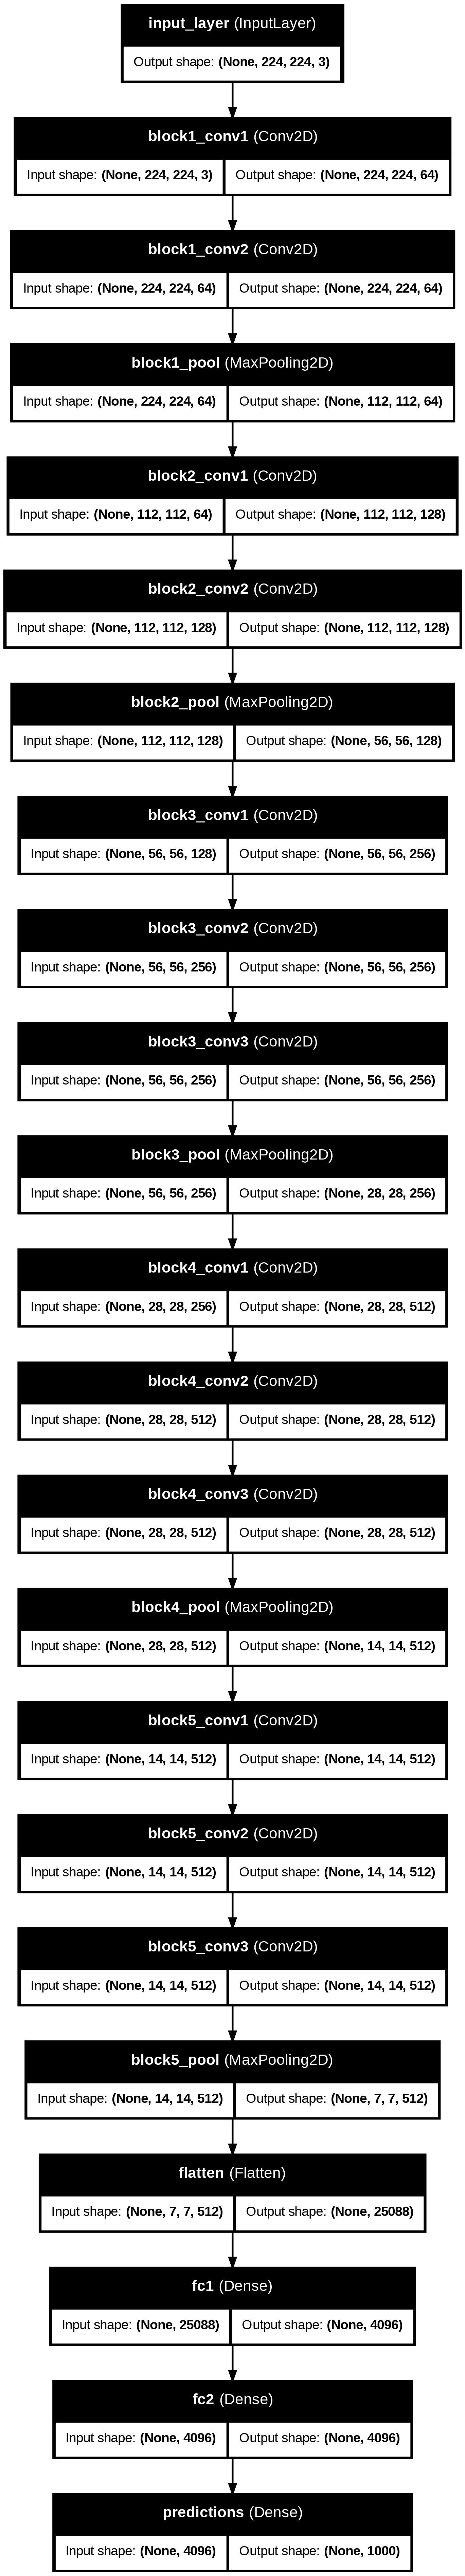

In [3]:
# Visualize the model architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file="vgg16_model_plot.png")

**Explore filters in convolutional layers**


In [4]:
# Iterate through the layers to retrieve and display filters
for i in range(len(model.layers)):
    # Check if the layer is a convolutional layer
    if 'conv' not in model.layers[i].name:
        continue
    # Retrieve filter weights and biases
    filters, biases = model.layers[i].get_weights()
    print(f"Layer {i} ({model.layers[i].name}) filters shape: {filters.shape}")


Layer 1 (block1_conv1) filters shape: (3, 3, 3, 64)
Layer 2 (block1_conv2) filters shape: (3, 3, 64, 64)
Layer 4 (block2_conv1) filters shape: (3, 3, 64, 128)
Layer 5 (block2_conv2) filters shape: (3, 3, 128, 128)
Layer 7 (block3_conv1) filters shape: (3, 3, 128, 256)
Layer 8 (block3_conv2) filters shape: (3, 3, 256, 256)
Layer 9 (block3_conv3) filters shape: (3, 3, 256, 256)
Layer 11 (block4_conv1) filters shape: (3, 3, 256, 512)
Layer 12 (block4_conv2) filters shape: (3, 3, 512, 512)
Layer 13 (block4_conv3) filters shape: (3, 3, 512, 512)
Layer 15 (block5_conv1) filters shape: (3, 3, 512, 512)
Layer 16 (block5_conv2) filters shape: (3, 3, 512, 512)
Layer 17 (block5_conv3) filters shape: (3, 3, 512, 512)


In [5]:
# Retrieve filters and biases from the first convolutional layer
filters, bias = model.layers[1].get_weights()

In [6]:
# Normalize the filter values to the range 0-1 for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

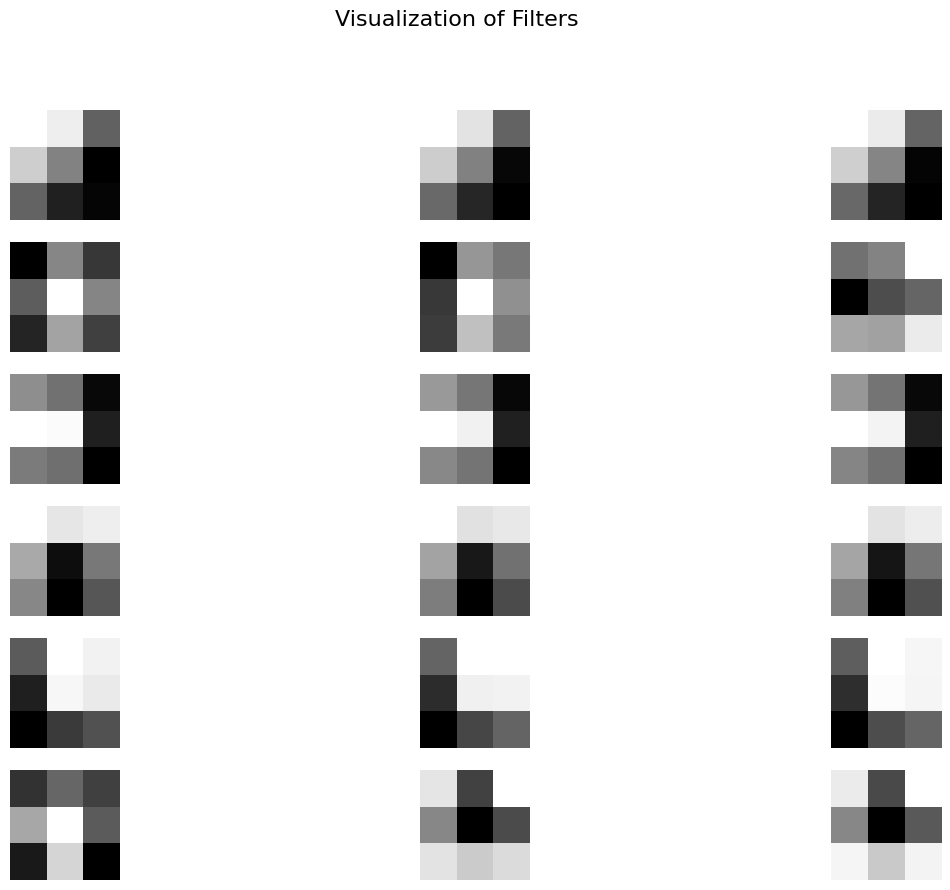

In [7]:
# Visualize the first 6 filters and their 3 channels
n_filters = 6
ix = 1
plt.figure(figsize=(15, 10))
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:, :, j], cmap='gray')
        plt.axis('off')
        ix += 1
plt.suptitle("Visualization of Filters", fontsize=16)
plt.show()

**Visualize feature maps for the first convolutional layer**


In [8]:
# Create a new model to output the feature maps of the first conv layer
model_layer1 = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [9]:
# Load and preprocess an input image
image_path = "/content/geoffrey.jpg"
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)  # Expand dimensions to match the model input
image = preprocess_input(image)

In [10]:
# Generate the feature maps
features = model_layer1.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


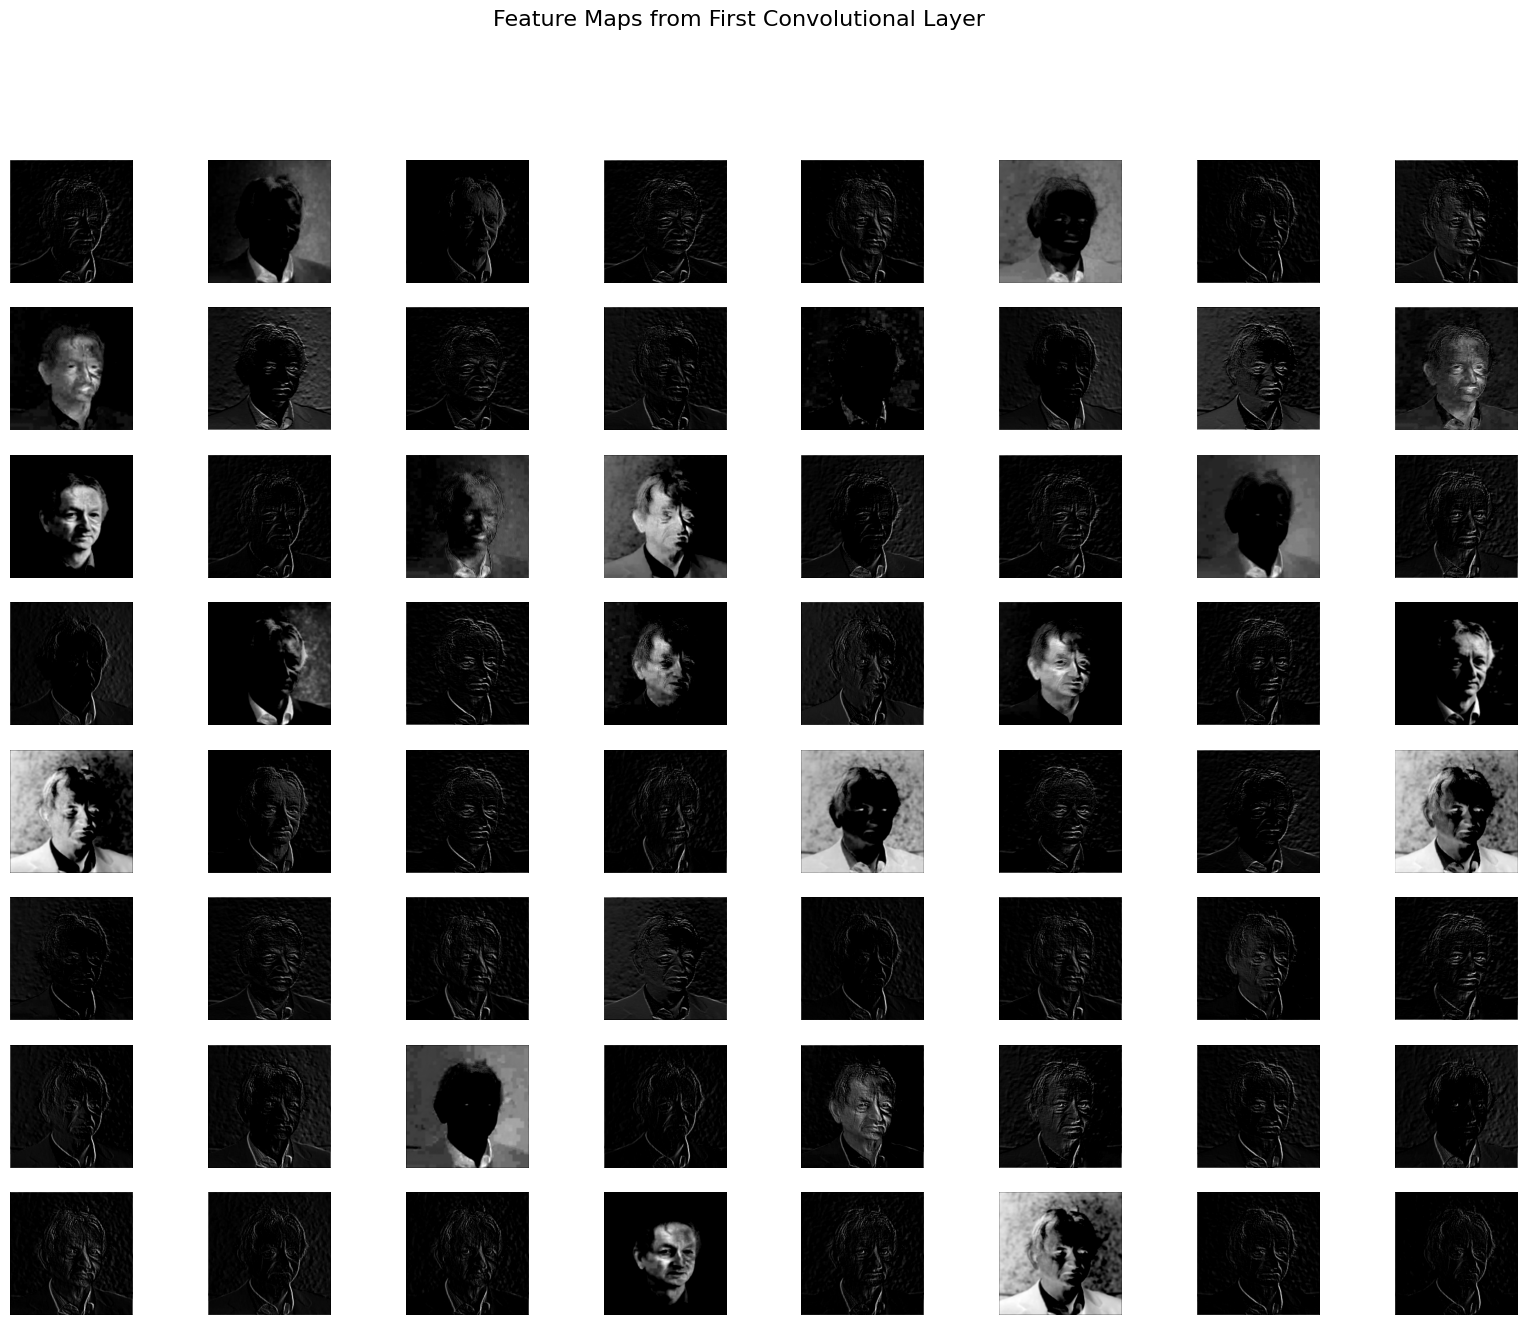

In [11]:
# Visualize the feature maps
plt.figure(figsize=(20, 15))
for i in range(1, features.shape[3] + 1):
    plt.subplot(8, 8, i)
    plt.imshow(features[0, :, :, i - 1], cmap='gray')
    plt.axis('off')
plt.suptitle("Feature Maps from First Convolutional Layer", fontsize=16)
plt.show()

**Visualize feature maps from multiple layers**


In [12]:
# Define layer indices to visualize
layer_indices = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in layer_indices]

In [13]:
# Create a new model to output the feature maps for selected layers
model_layers = Model(inputs=model.inputs, outputs=outputs)

In [14]:
# Generate feature maps for the input image
feature_maps = model_layers.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


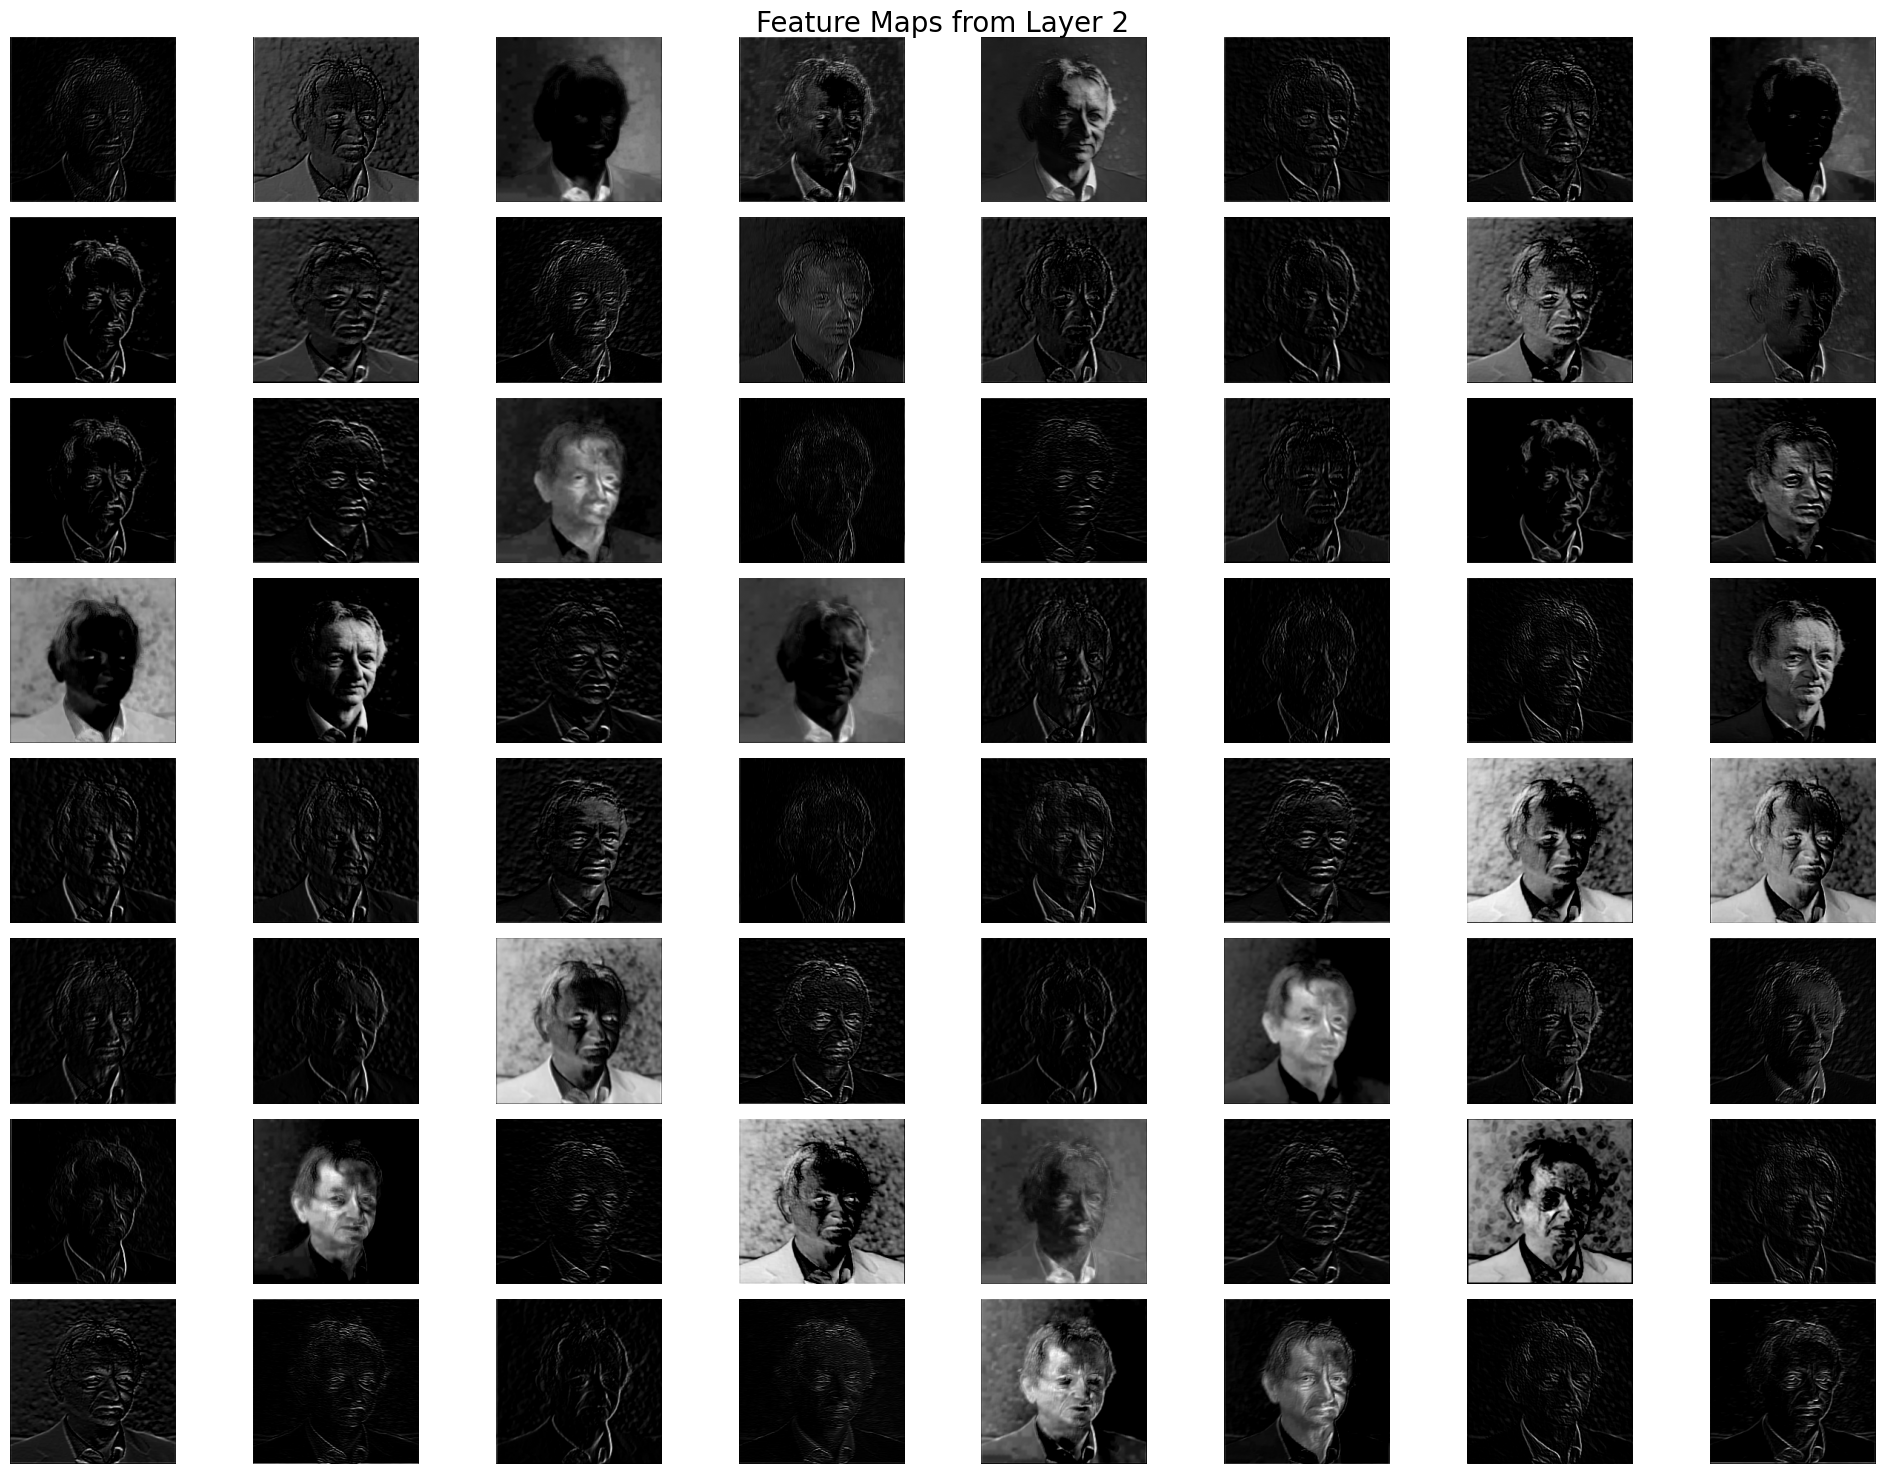

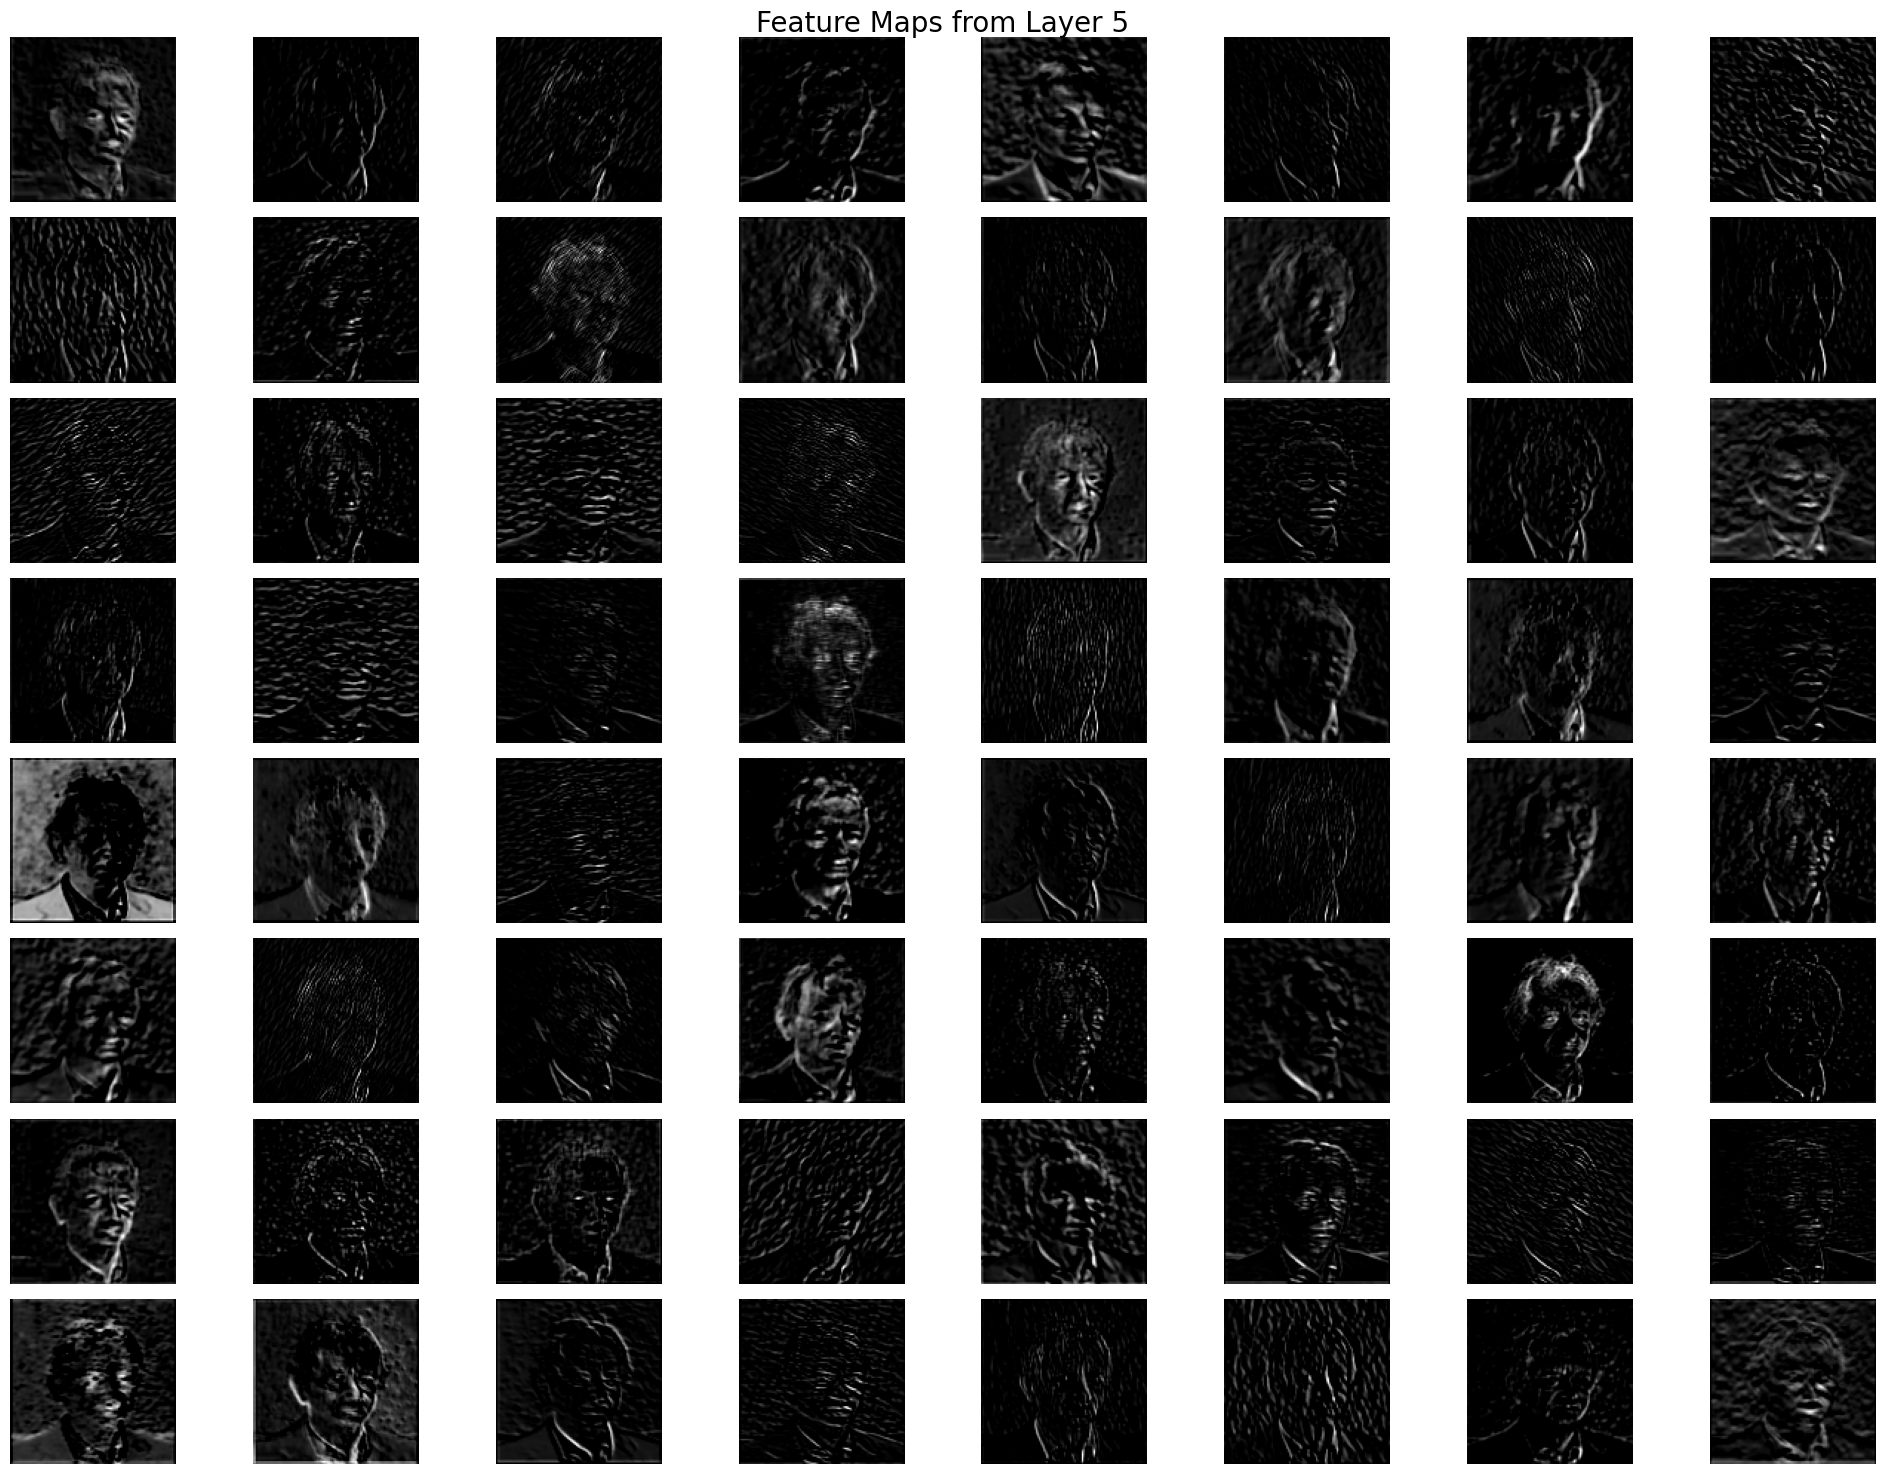

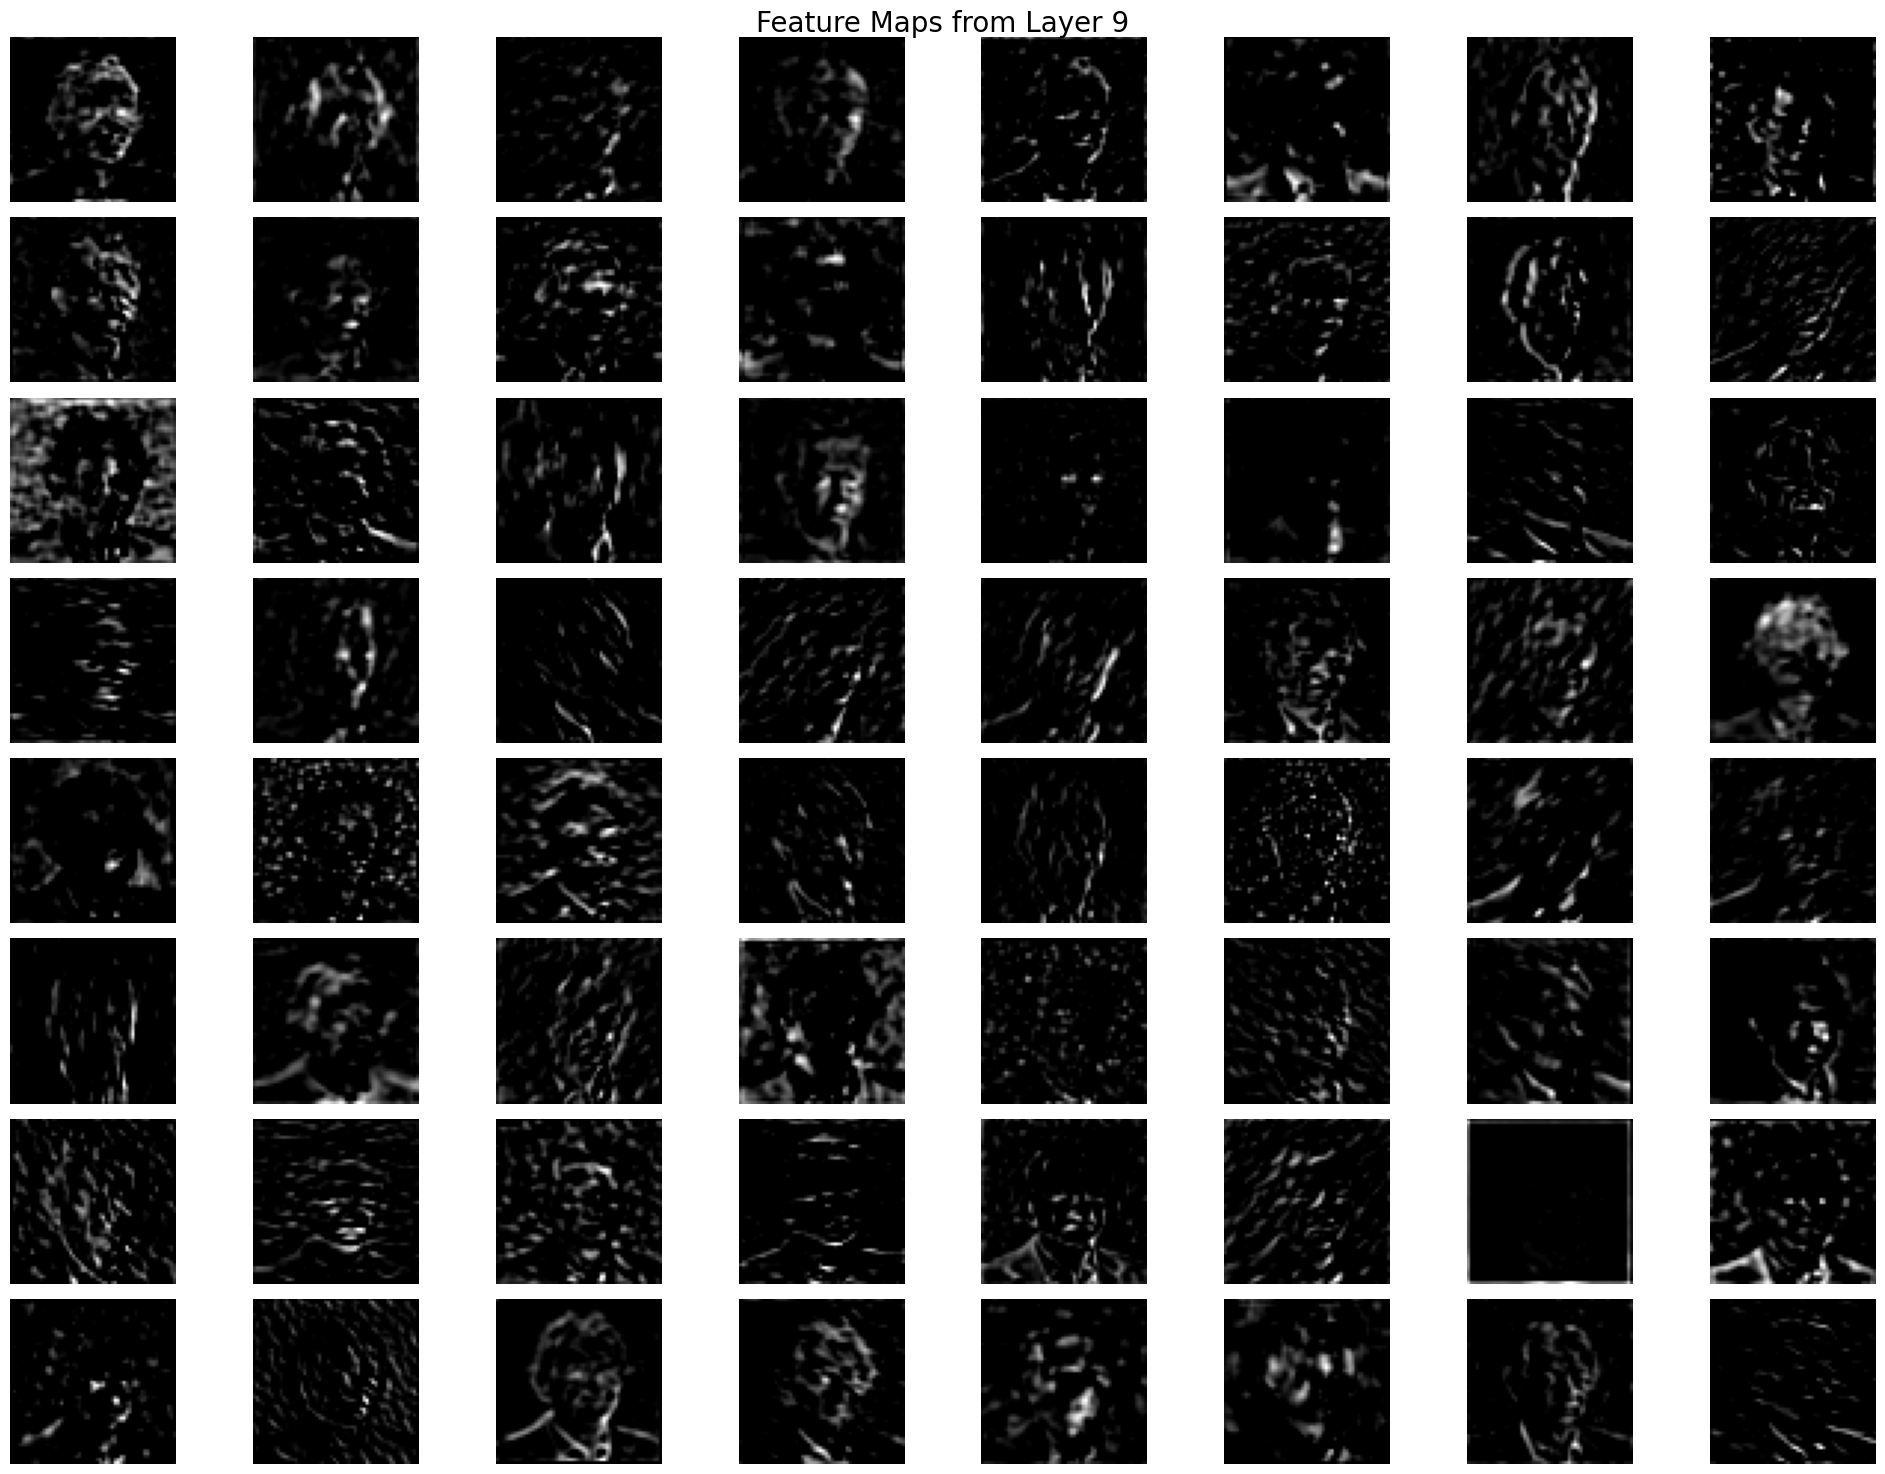

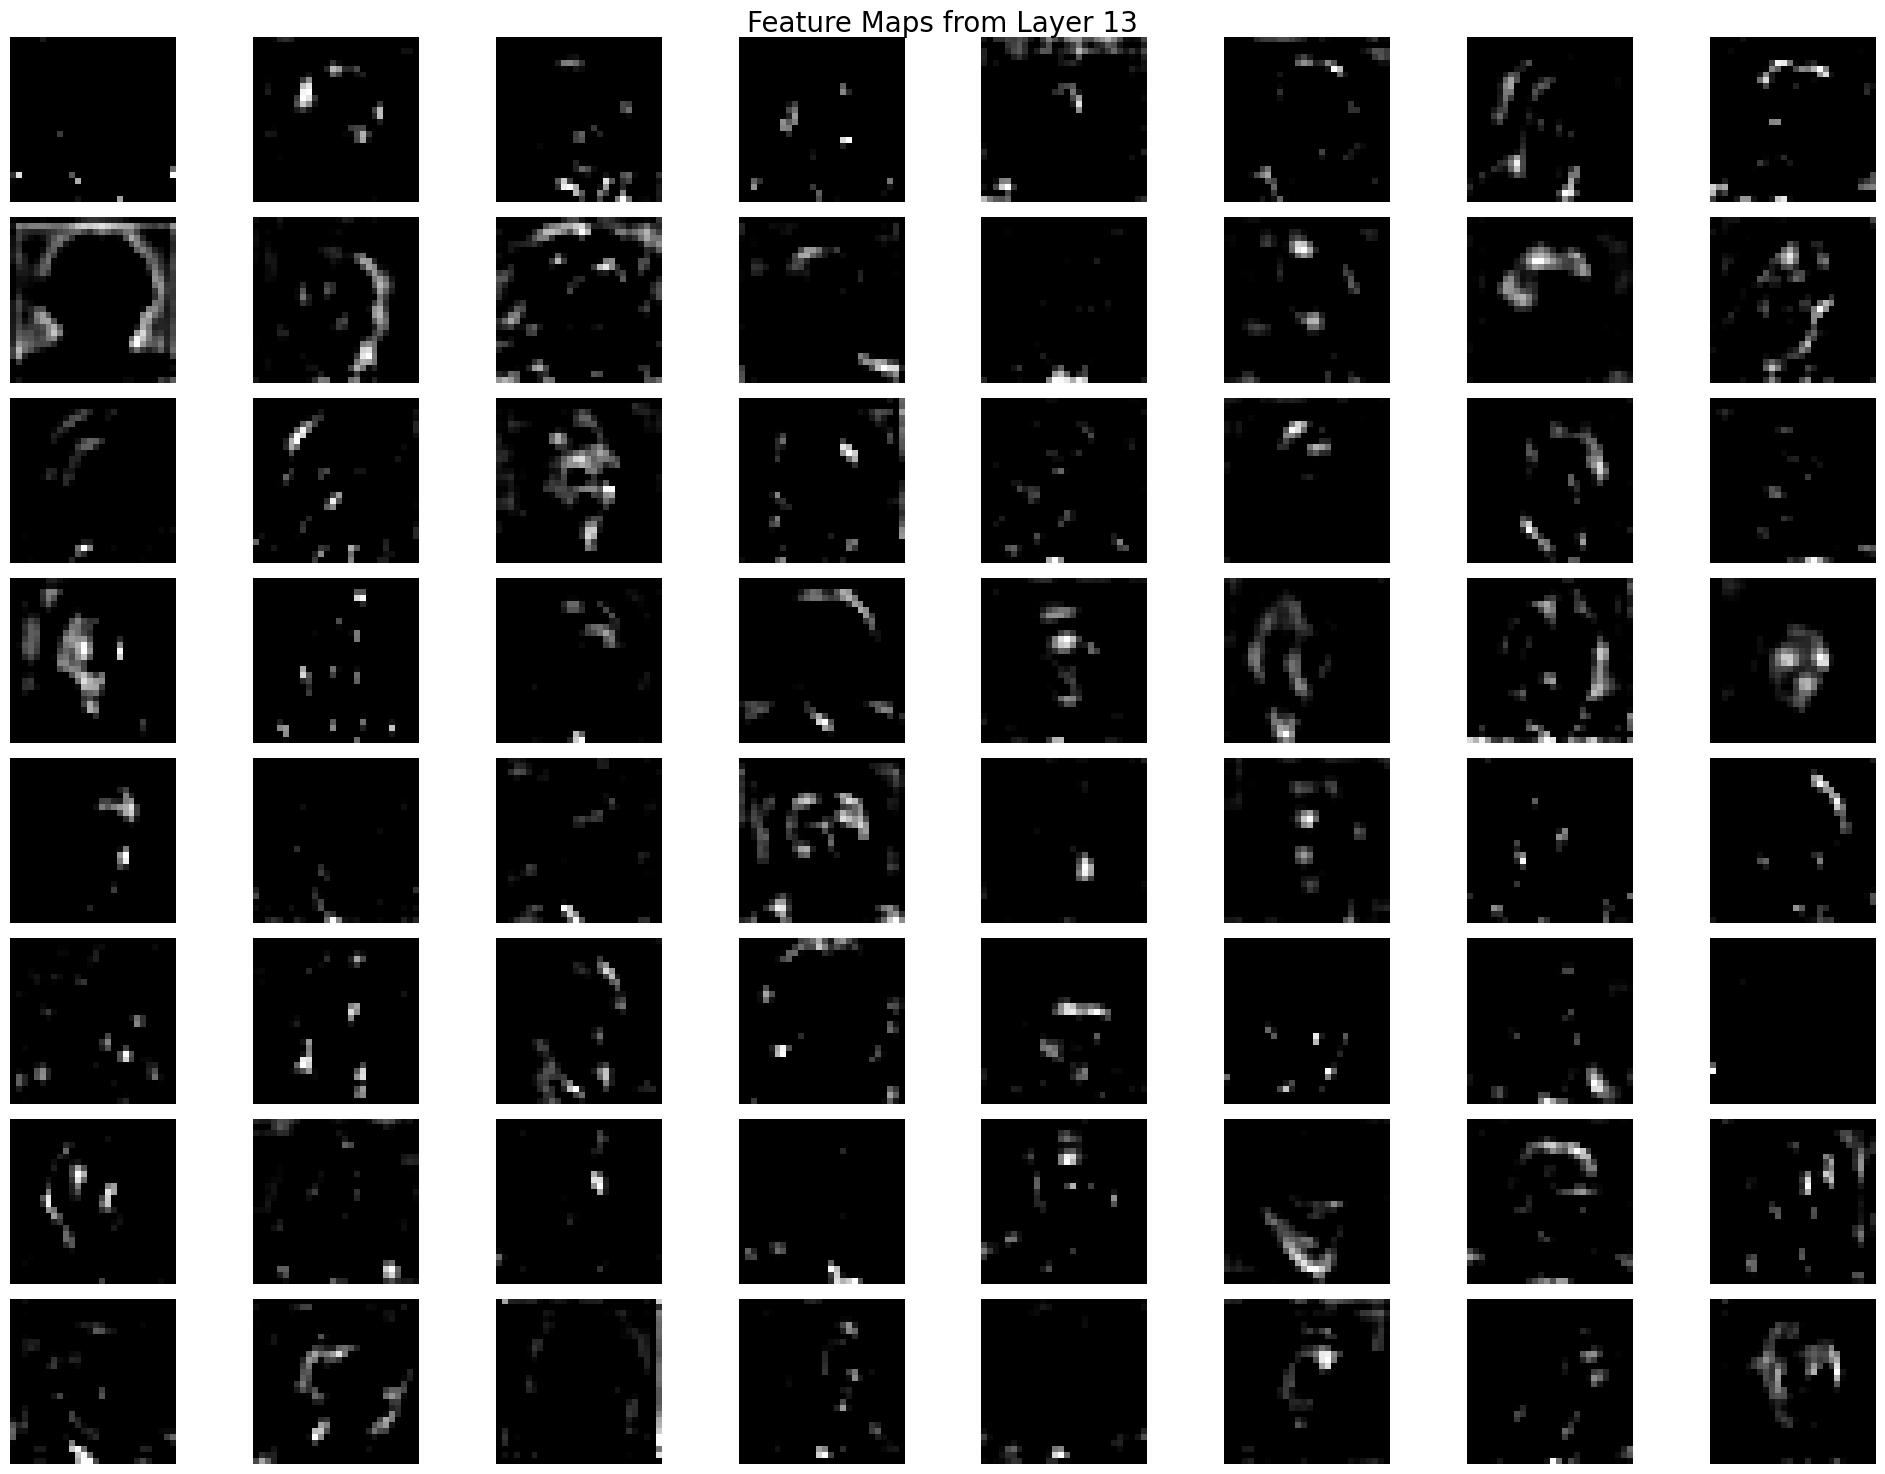

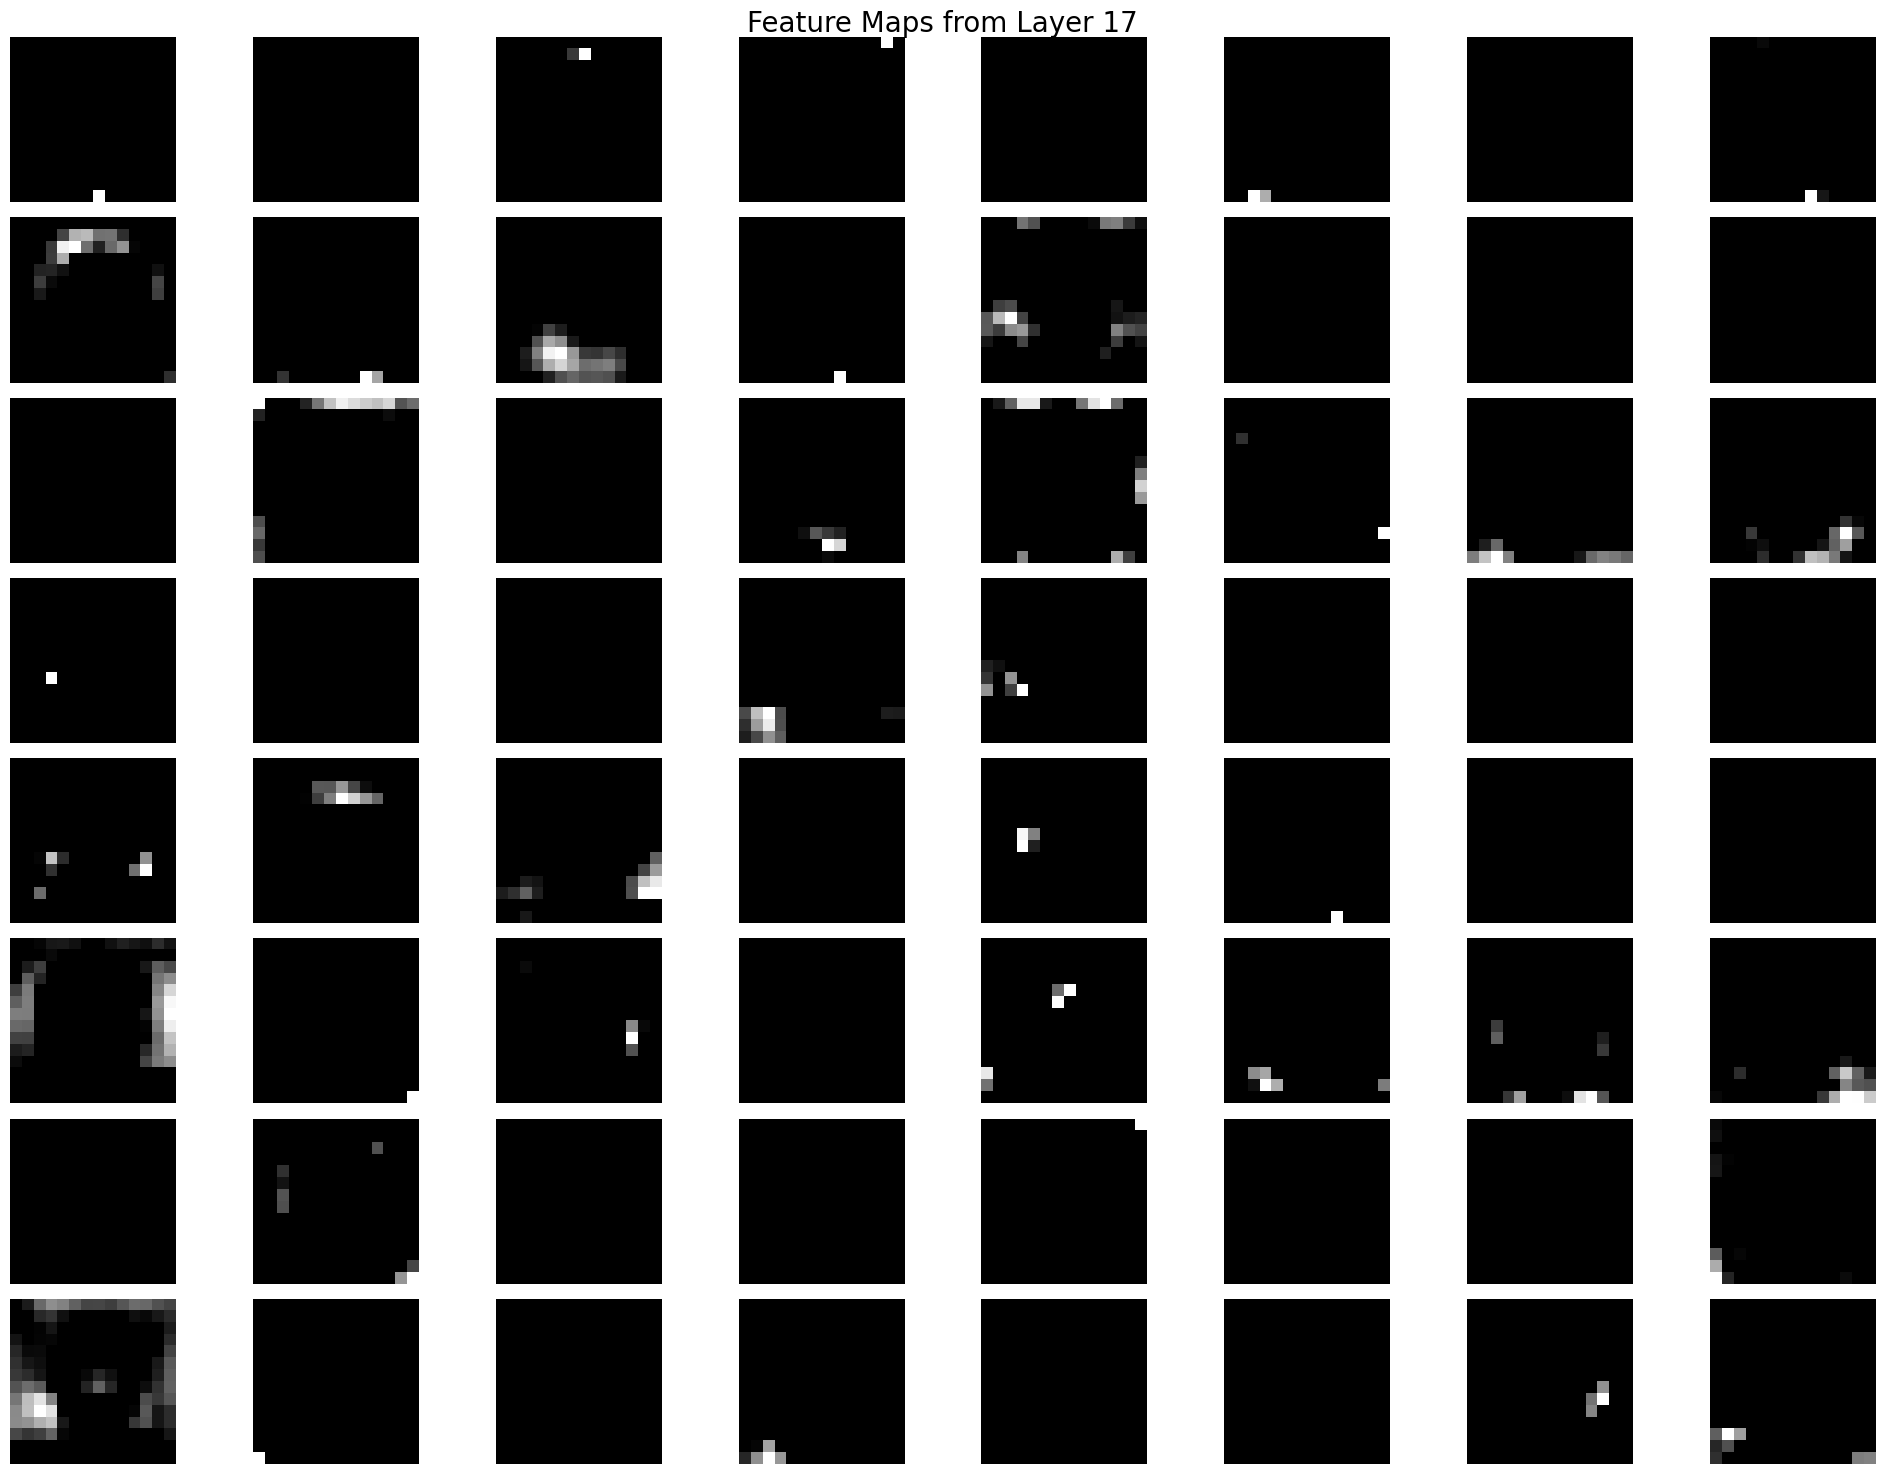

In [16]:
# Visualize feature maps for each selected layer
for idx, fmap in zip(layer_indices, feature_maps):
    plt.figure(figsize=(20, 15))
    plt.suptitle(f"Feature Maps from Layer {idx}", fontsize=20)
    for i in range(1, min(fmap.shape[3] + 1, 65)):
        plt.subplot(8, 8, i)
        plt.imshow(fmap[0, :, :, i - 1], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
